In [21]:
import requests
#requests is a library used pythong to get data from apis
#get a request method(basically a function)
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
url="http://api.icndb.com/jokes/random"
one_joke=requests.get(url).json()
pprint(one_joke)

{'type': 'success',
 'value': {'categories': [],
           'id': 157,
           'joke': 'A study showed the leading causes of death in the United '
                   'States are: 1. Heart disease, 2. Chuck Norris, 3. Cancer'}}


In [3]:
pprint(one_joke["value"])

{'categories': [],
 'id': 157,
 'joke': 'A study showed the leading causes of death in the United States are: '
         '1. Heart disease, 2. Chuck Norris, 3. Cancer'}


In [5]:
murl = "http://api.icndb.com/jokes/random/3"
multi_joke = requests.get(murl).json()
pprint(multi_joke)

{'type': 'success',
 'value': [{'categories': [],
            'id': 243,
            'joke': "Contrary to popular belief, the Titanic didn't hit an "
                    'iceberg. The ship was off course and ran into Chuck '
                    'Norris while he was doing the backstroke across the '
                    'Atlantic.'},
           {'categories': [],
            'id': 204,
            'joke': 'Nagasaki never had a bomb dropped on it. Chuck Norris '
                    'jumped out of a plane and punched the ground'},
           {'categories': [],
            'id': 442,
            'joke': 'Everything King Midas touches turnes to gold. Everything '
                    'Chuck Norris touches turns up dead.'}]}


In [6]:
pprint(multi_joke["value"])

[{'categories': [],
  'id': 243,
  'joke': "Contrary to popular belief, the Titanic didn't hit an iceberg. The "
          'ship was off course and ran into Chuck Norris while he was doing '
          'the backstroke across the Atlantic.'},
 {'categories': [],
  'id': 204,
  'joke': 'Nagasaki never had a bomb dropped on it. Chuck Norris jumped out of '
          'a plane and punched the ground'},
 {'categories': [],
  'id': 442,
  'joke': 'Everything King Midas touches turnes to gold. Everything Chuck '
          'Norris touches turns up dead.'}]


In [22]:
list = multi_joke["value"]
#for each element in this list,
for element in list:
    #do these things with them
    print(f'Joke ID: {element["id"]}')
    print(f'Joke Line: {element["joke"]}')
    print(f'Joke Line Length(By Character): {len(element["joke"])}')
    print('=================================')

Joke ID: 243
Joke Line: Contrary to popular belief, the Titanic didn't hit an iceberg. The ship was off course and ran into Chuck Norris while he was doing the backstroke across the Atlantic.
Joke Line Length(By Character): 167
Joke ID: 204
Joke Line: Nagasaki never had a bomb dropped on it. Chuck Norris jumped out of a plane and punched the ground
Joke Line Length(By Character): 98
Joke ID: 442
Joke Line: Everything King Midas touches turnes to gold. Everything Chuck Norris touches turns up dead.
Joke Line Length(By Character): 92


In [16]:
joke_list=[]
for joke in multi_joke["value"]:
    joke_list.append([joke["id"], joke["joke"], len(joke["joke"])])
print(joke_list)

[[243, "Contrary to popular belief, the Titanic didn't hit an iceberg. The ship was off course and ran into Chuck Norris while he was doing the backstroke across the Atlantic.", 167], [204, 'Nagasaki never had a bomb dropped on it. Chuck Norris jumped out of a plane and punched the ground', 98], [442, 'Everything King Midas touches turnes to gold. Everything Chuck Norris touches turns up dead.', 92]]


In [19]:
chuck_data = pd.DataFrame(joke_list)
chuck_data.sample(3)

,0,1,2
2,442,Everything King Midas touches turnes to gold. ...,92
1,204,Nagasaki never had a bomb dropped on it. Chuck...,98
0,243,"Contrary to popular belief, the Titanic didn't...",167


In [20]:
chuck_data.columns=["ID", "JOKE", "JOKE LENGTH"]
chuck_data.dropna(axis=0, how="any", inplace=True)
chuck_data.to_csv("./Resources/chucknorris.csv", index=False, header=True)

In [25]:
chuck_csv = "Resources/chucknorris.csv"

In [24]:
read_file = pd.read_csv(chuck_csv)
read_file.head()

,ID,JOKE,JOKE LENGTH
0,243,"Contrary to popular belief, the Titanic didn't...",167
1,204,Nagasaki never had a bomb dropped on it. Chuck...,98
2,442,Everything King Midas touches turnes to gold. ...,92


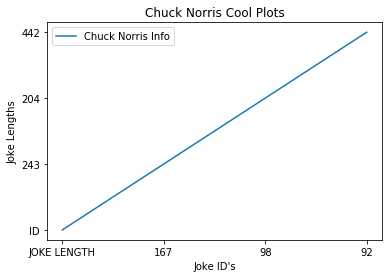

['JOKE LENGTH', '167', '98', '92']
['ID', '243', '204', '442']


In [35]:
x=[]

y=[]

with open("./Resources/chucknorris.csv") as csvfile:
    plots=  csv.reader(csvfile, delimiter=",")
    for row in plots:
        y.append(row[0])
        x.append(row[2])
plt.plot(x, y, label="Chuck Norris Info")
plt.xlabel("Joke ID's")
plt.ylabel("Joke Lengths")
plt.title("Chuck Norris Cool Plots")
plt.legend()
plt.show()
print(x)
print(y)

[  0  40  80 120 160]


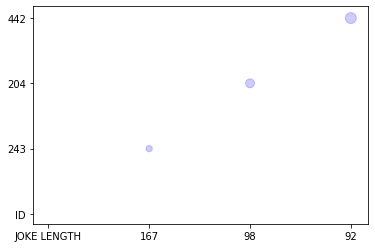

In [50]:
x_limit = 170
x_axis=np.arange(0, x_limit, 40)
print(x_axis)
plt.scatter(x, y, marker="o", facecolor="blue", edgecolors="blue", alpha =0.2, s=x_axis)

